<a href="https://colab.research.google.com/github/shotokillua/cv/blob/main/day-77-Advanced-Linear-regression-and-Data-Visualization-with-Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

**5391 rows and 6 columns.**

In [ ]:
data.isna().values.any()

False

**No NaN values present.**

In [ ]:
data.duplicated().values.any()


False

**No duplicate rows.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


**All columns except Rank column are objects. Rank column is an integer.**

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

In [ ]:
for col in columns_to_clean:
  for char in chars_to_remove:
    # Replace each character with an empty string
    data[col] = data[col].astype(str).str.replace(char, "")
  # Convert column to a numeric data type
  data[col] = pd.to_numeric(data[col])

<ipython-input-13-4140744973ef>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
data[data['USD_Production_Budget'] == 1100.0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
data[data['USD_Production_Budget'] == 425000000.0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


1 - Average production budget of films in data set is $31,113,737.58

2 - Average worldwide gross revenue of films is $88,855,421.96

3 - Minimums for worldwide and domestic revenue are 0 and 0, respectively

4 - The bottom 25% of films are not actually profitable

5 - Highest production budget is 425,000,000 and highest worldwide gross revenue is 2,783,918,982.00

6 - Lowest budget film made 181,041 and Highest budget film made 2,783,918,982.00

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data['USD_Domestic_Gross'] == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [ ]:
(data['USD_Domestic_Gross'] == 0).value_counts()

False    4879
True      512
Name: USD_Domestic_Gross, dtype: int64

In [ ]:
zero_gross = data[data['USD_Domestic_Gross'] == 0]
zero_gross.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_gross_ww = data[data['USD_Worldwide_Gross'] == 0]
zero_gross_ww.count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [ ]:
zero_gross_ww.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,357.00,357.00,357.00,357.00
mean,"4,444.68","5,815,404.99",0.00,0.00
std,995.70,"16,262,169.21",0.00,0.00
min,96.00,"1,400.00",0.00,0.00
25%,"4,148.00","500,000.00",0.00,0.00
50%,"4,751.00","1,500,000.00",0.00,0.00
75%,"5,108.00","4,400,000.00",0.00,0.00
max,"5,390.00","175,000,000.00",0.00,0.00


In [ ]:
data[data['USD_Production_Budget'] == 175000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
795,93,1995-07-28,Waterworld,175000000,264246220,88246220
1264,90,1999-06-30,Wild Wild West,175000000,221229335,113805681
2922,92,2007-06-22,Evan Almighty,175000000,174131329,100289690
3063,91,2008-01-08,The Mummy: Tomb of the Dragon Emperor,175000000,405760225,102491776
3353,88,2009-03-27,Monsters vs. Aliens,175000000,381687380,198351526
3385,86,2009-05-29,Up,175000000,731542621,293004164
3415,89,2009-07-08,G.I. Joe: The Rise of Cobra,175000000,302469017,150201498
4517,95,2013-12-25,47 Ronin,175000000,151716815,38362475
4928,84,2015-06-19,Inside Out,175000000,853707581,356461711
5171,83,2016-04-15,The Jungle Book,175000000,963901123,364001123


### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]
print(f'Number of international releases: {len(international_releases)}')

Number of international releases: 155


In [ ]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
future_releases = data[data['Release_Date'] >= scrape_date]
future_releases.count()

Rank                     7
Release_Date             7
Movie_Title              7
USD_Production_Budget    7
USD_Worldwide_Gross      7
USD_Domestic_Gross       7
dtype: int64

In [ ]:
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37277117384843983

In [ ]:
prod_over_ww_gross = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross].count()
prod_over_ww_gross

Rank                     2007
Release_Date             2007
Movie_Title              2007
USD_Production_Budget    2007
USD_Worldwide_Gross      2007
USD_Domestic_Gross       2007
dtype: int64

In [ ]:
data_clean.shape

(5384, 6)

In [ ]:
print(f'The percentage of films where the production costs exceeded the worldwide gross revenue is {prod_over_ww_gross / len(data_clean)}%')

The percentage of films where the production costs exceeded the worldwide gross revenue is Rank                    0.37
Release_Date            0.37
Movie_Title             0.37
USD_Production_Budget   0.37
USD_Worldwide_Gross     0.37
USD_Domestic_Gross      0.37
dtype: float64%


# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

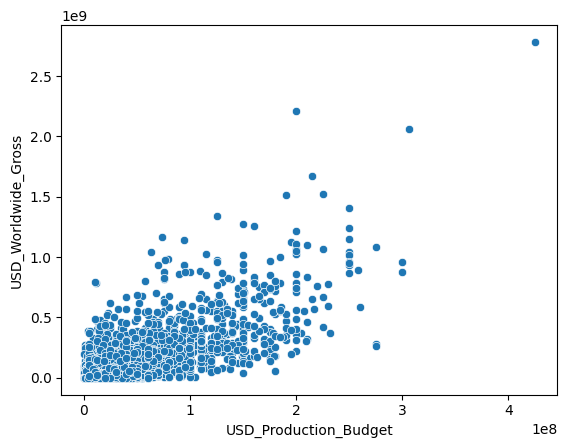

In [ ]:
sns.scatterplot(data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

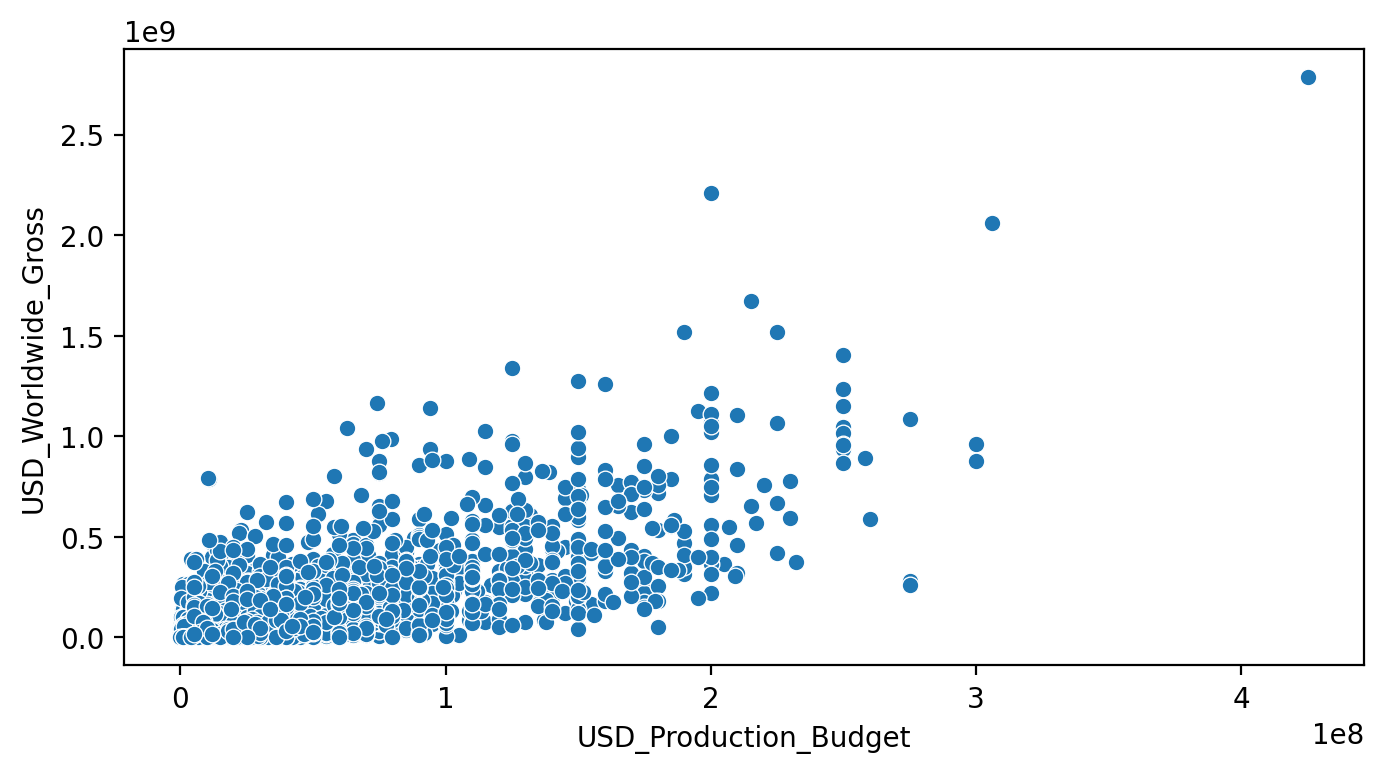

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
plt.show()

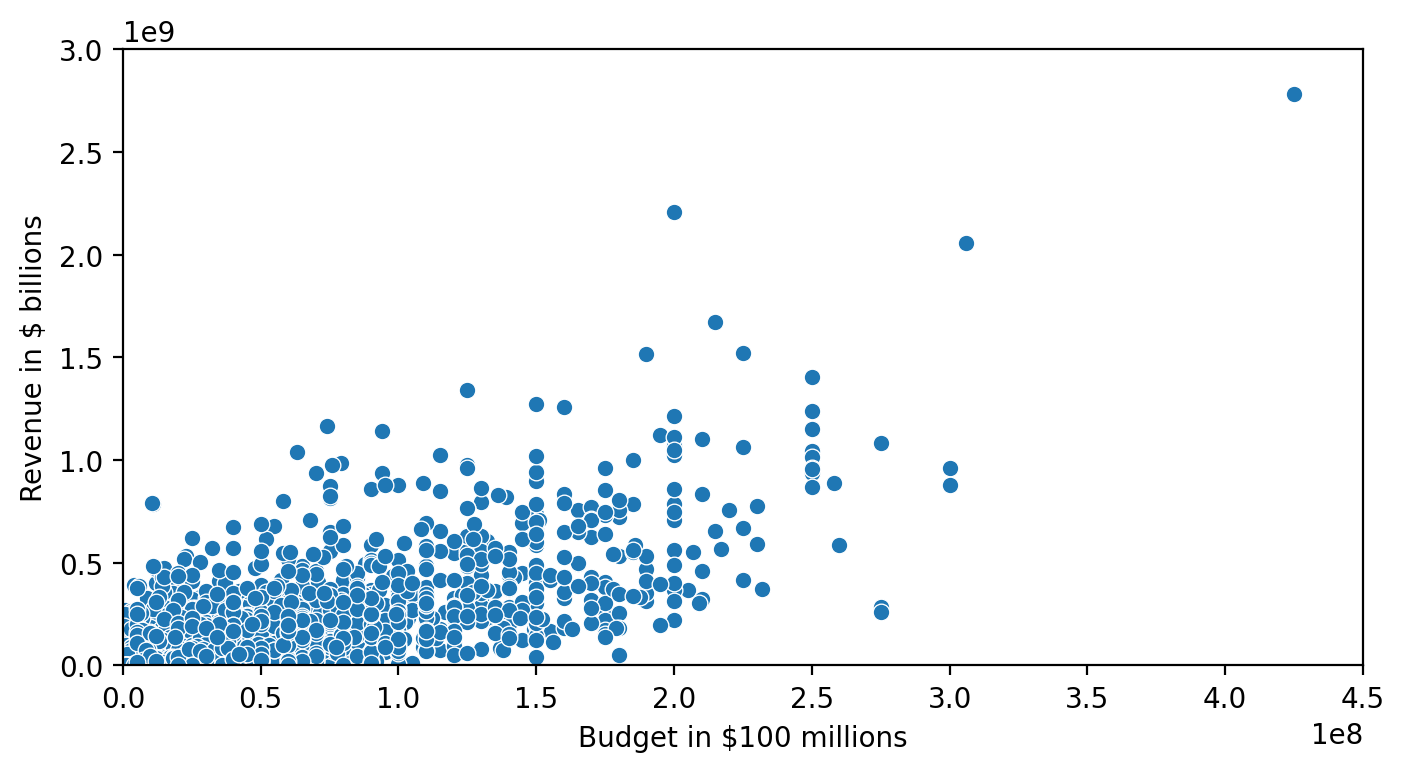

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

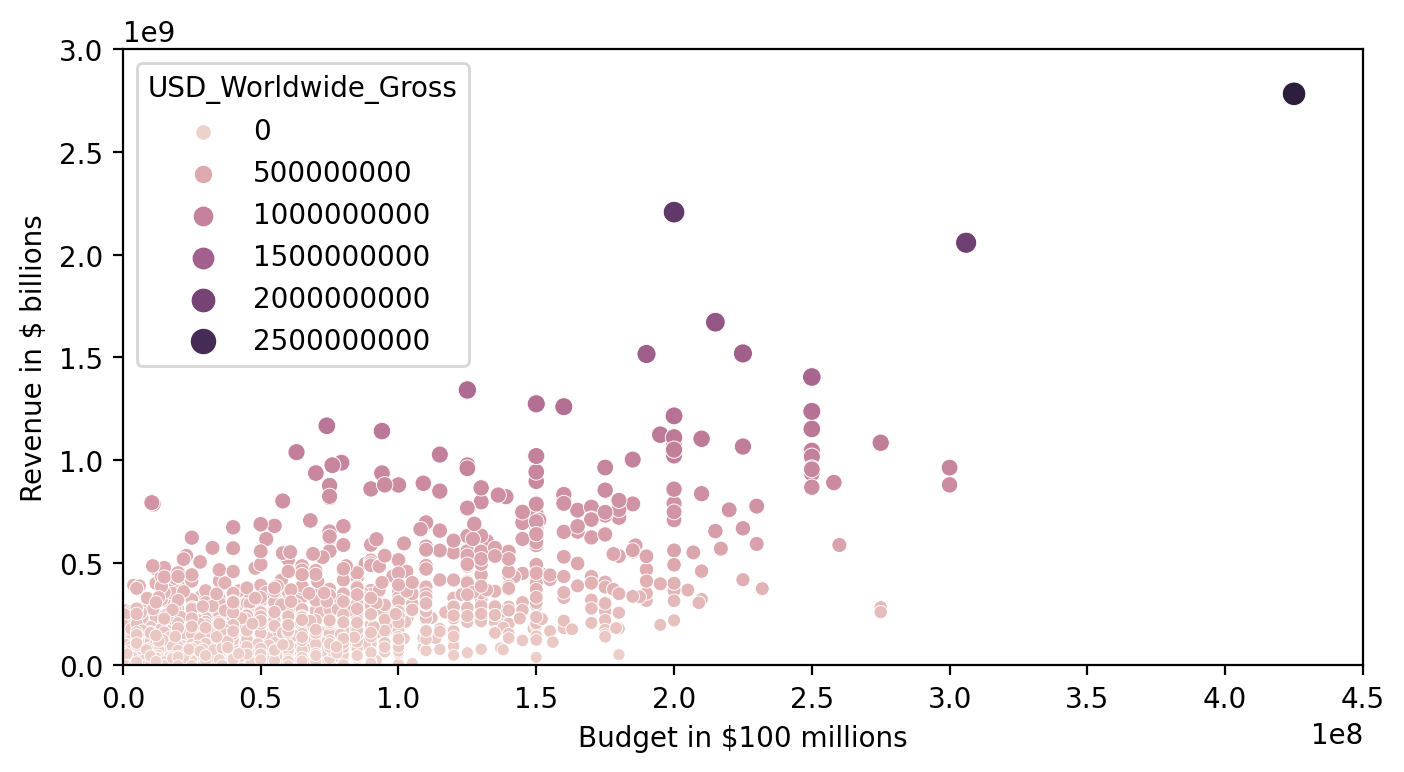

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



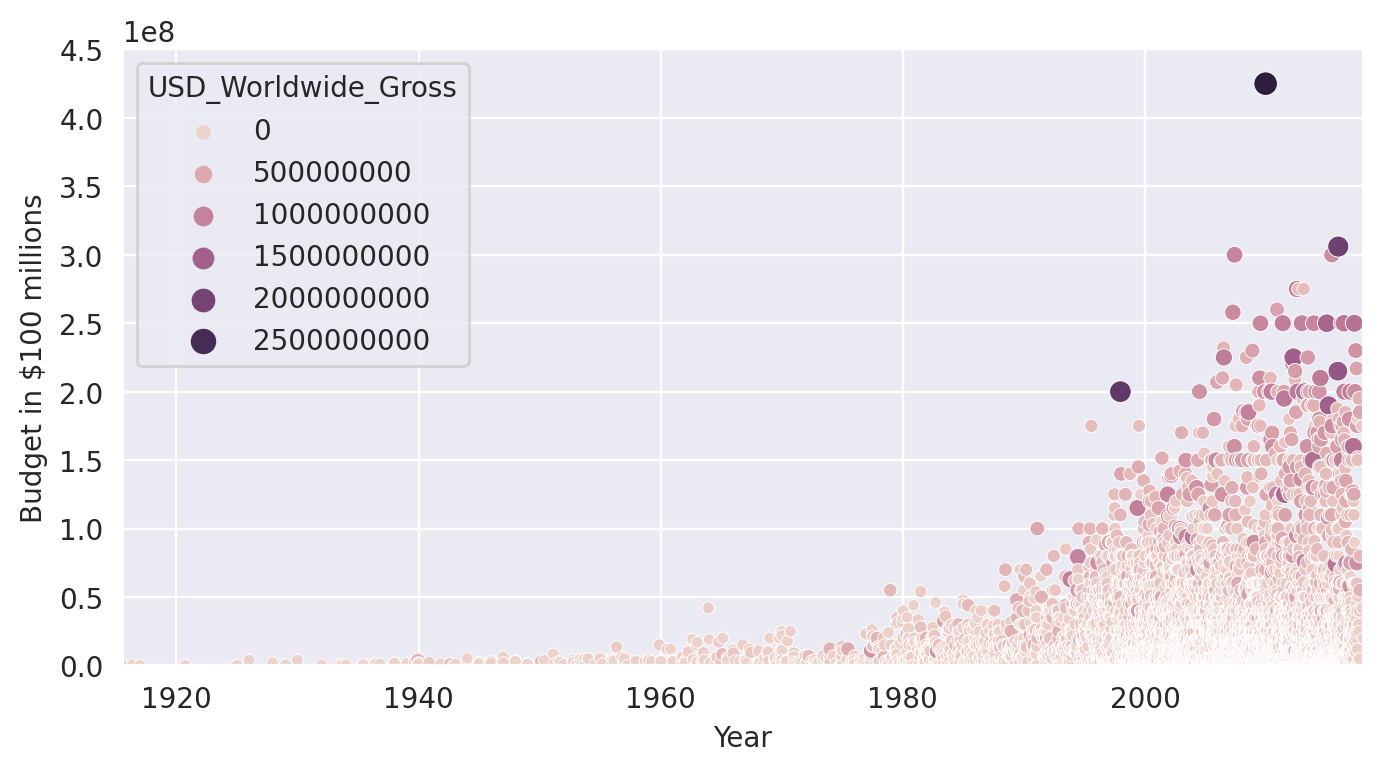

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x = 'Release_Date',
                       y = 'USD_Production_Budget',
                       hue = 'USD_Worldwide_Gross',
                       size = 'USD_Worldwide_Gross')
  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
         xlabel='Year',
         ylabel='Budget in $100 millions')


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])

years = dt_index.year
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


In [ ]:
decades = (years // 10) * 10
print(decades)

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)


In [ ]:
data_clean['Decades'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean['Decades'] < 1970]
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [ ]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [ ]:
old_films[old_films['USD_Production_Budget'] == 42000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


**153 films released prior to 1970, and the most expensive film made prior to 1970 had a budget of 42,000,000 (Cleopatra).**

In [ ]:
new_films = data_clean[data_clean['Decades'] >= 1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


# Seaborn Regression Plots

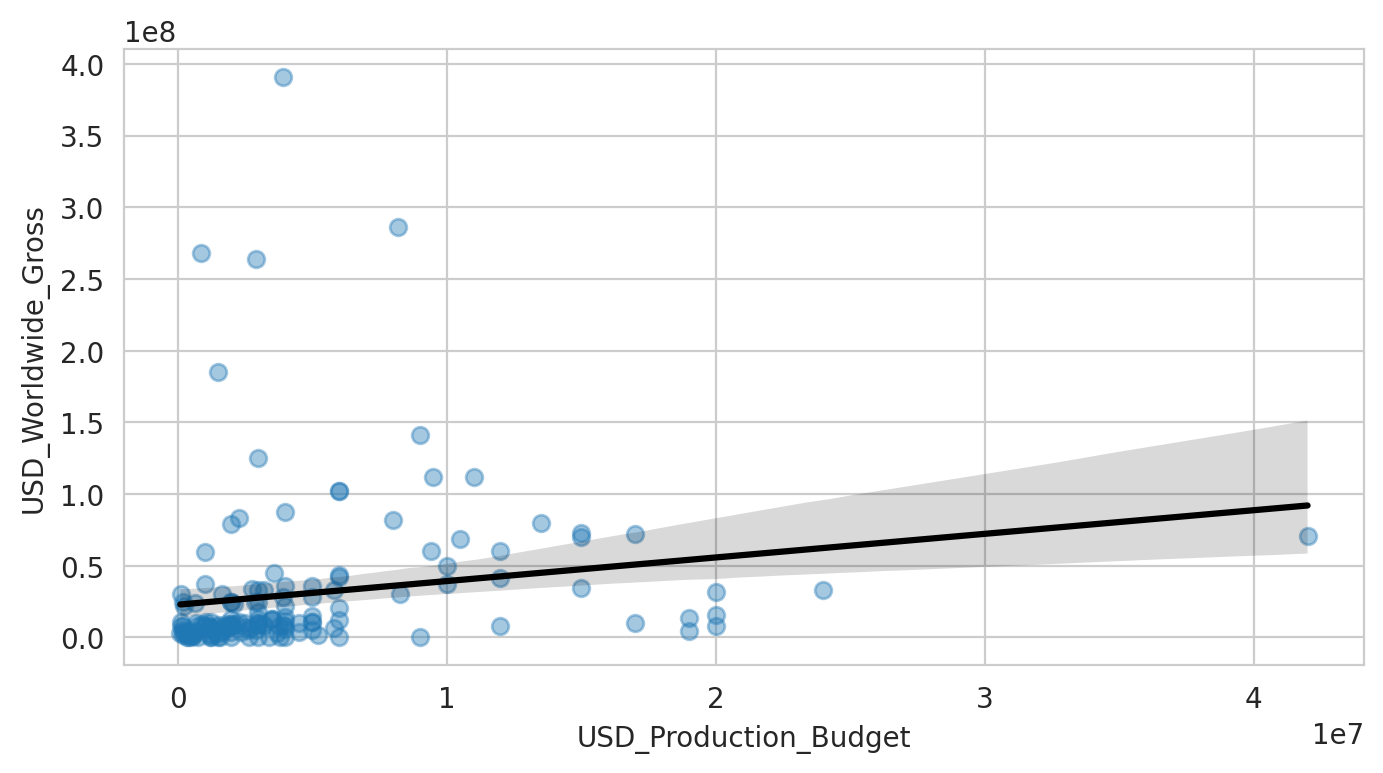

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):

  sns.regplot(data=old_films,
              x = 'USD_Production_Budget',
              y = 'USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4}, # changes transparency of the dots
              line_kws = {'color': 'black'}) # changes the color of the regression line

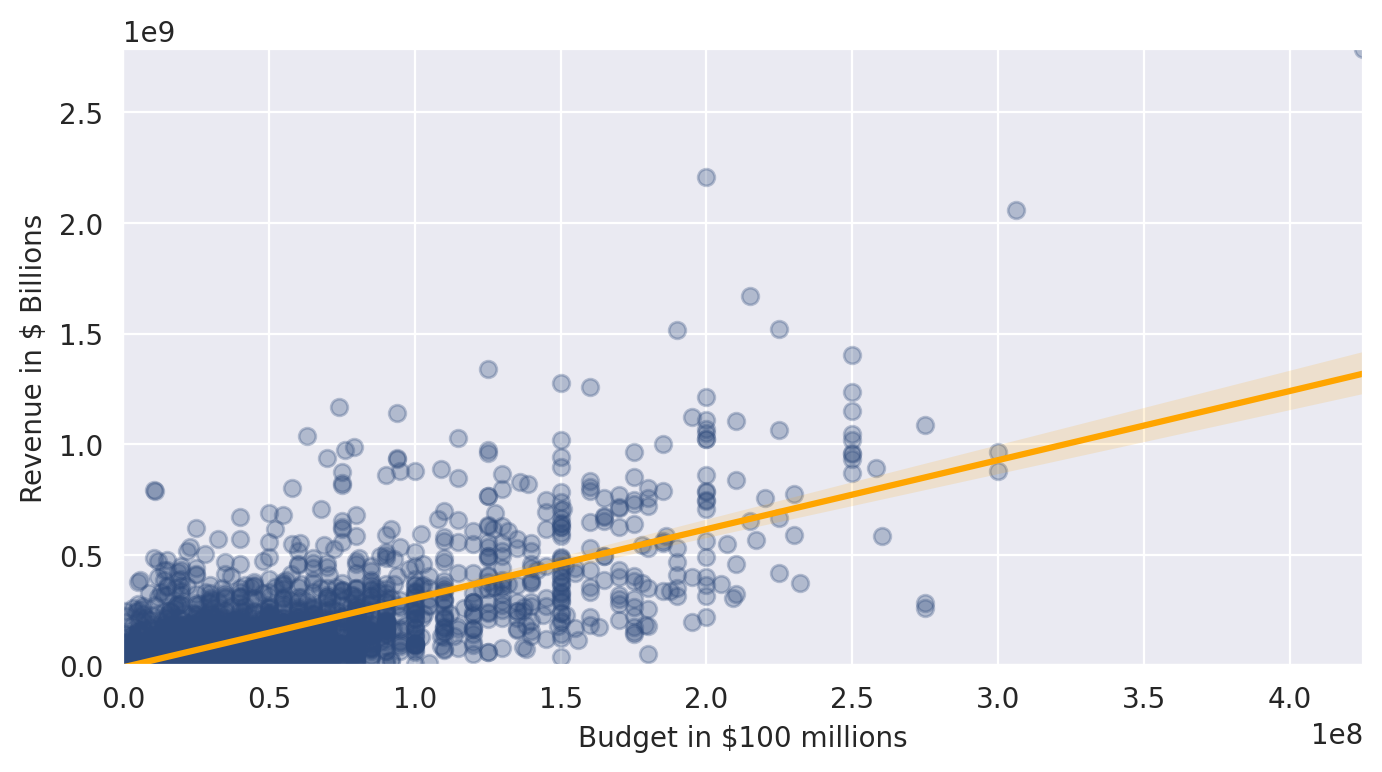

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):

  ax = sns.regplot(data=new_films,
              x = 'USD_Production_Budget',
              y = 'USD_Worldwide_Gross',
              color = '#2f4b7c',
              scatter_kws = {'alpha': 0.3},
              line_kws = {'color': 'orange'})

  ax.set(xlim=(0, new_films['USD_Production_Budget'].max()),
        ylim=(0, new_films['USD_Worldwide_Gross'].max()),
        xlabel = 'Budget in $100 millions',
        ylabel = 'Revenue in $ Billions',)

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

**The data points for the new films align better with the linear regression than for the older films. A film w a budget of $150 million makes roughly 0.5 Billion in revenue according to the regression line.**

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
regression = LinearRegression()

In [ ]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

In [ ]:
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [ ]:
regression.fit(X,y)

LinearRegression()

In [ ]:
regression.intercept_ # y-intercept

array([-8650768.00661027])

In [ ]:
regression.coef_ # slope

array([[3.12259592]])

In [ ]:
regression.score(X,y) # R-squared value

0.5577032617720403

In [ ]:
XX = pd.DataFrame(data=old_films, columns=['USD_Production_Budget'])
yy = pd.DataFrame(data=old_films, columns=['USD_Worldwide_Gross'])

In [ ]:
regression.fit(XX, yy)

LinearRegression()

In [ ]:
regression.intercept_

array([22821538.63508039])

In [ ]:
regression.coef_

array([[1.64771314]])

In [ ]:
regression.score(XX, yy)

0.02937258620576877

Y intercept is 22,821,538.
Slope is 1.65.
R-Squared value is 0.029.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
22821538.63508039 + 1.64771314 * (350000000)

599521137.6350803

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
